In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
assets = ['MSFT','GOOGL']
pf_data = pd.DataFrame()

In [42]:
for a in assets :
    pf_data[a] = wb.DataReader(a,'quandl', '2010-1-1', '2018-1-1')['AdjClose']

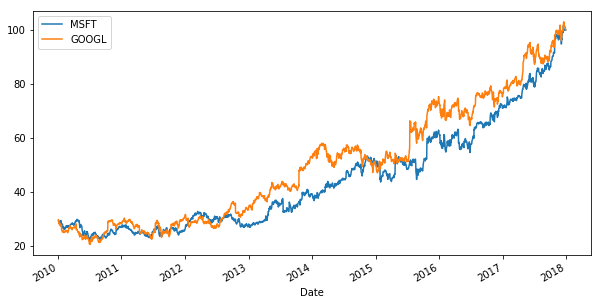

In [54]:
#pf_data = pf_data.iloc[::-1]
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10,5))

In [56]:
pf_data = pf_data.iloc[::-1]
log_returns = np.log(pf_data/pf_data.shift(1))
log_returns

,MSFT,GOOGL
Date,,
2010-01-04,NaN,NaN
2010-01-05,0.000323,-0.004413
2010-01-06,-0.006156,-0.025532
2010-01-07,-0.010389,-0.023555
2010-01-08,0.006807,0.013243
2010-01-11,-0.012802,-0.001513
2010-01-12,-0.006629,-0.017842
2010-01-13,0.009269,-0.005758
2010-01-14,0.019900,0.004690


In [59]:
print(str((((log_returns.mean() + 1)**250) - 1)*100) + ' %')

MSFT     16.429452
GOOGL    16.216976
dtype: float64 %


In [60]:
log_returns.cov() *250

,MSFT,GOOGL
MSFT,0.049235,0.025028
GOOGL,0.025028,0.055883


In [61]:
log_returns.corr()

,MSFT,GOOGL
MSFT,1.00000,0.47714
GOOGL,0.47714,1.00000


In [63]:
num_assets = len(assets)
weights = np.random.random(num_assets)

In [65]:
weights = np.random.random(num_assets)
weights/=np.sum(weights)
weights

array([0.51613153, 0.48386847])

In [66]:
log_annual = ((log_returns.mean() + 1)**250) - 1

In [69]:
#Expected portfolio returns
np.sum(weights * log_annual)

0.16326641729894442

In [71]:
 #Expected Portfolio Variance
np.dot(weights.T, np.dot(log_returns.cov() * 250,weights))

0.03870036449082226

In [72]:
#Expected Portfolio Volatility
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250,weights)))

0.19672408213236695

In [108]:
pfolio_returns = []
pfolio_volatilities = []
for x in range(1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_annual))
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250,weights))))
    if pfolio_returns[x]>0.1634 and pfolio_volatilities[x]<0.1966 :
        print('Microsoft : ' + str(weights[0]) + ' Google : ' + str(weights[1]))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)
#pfolio_returns,pfolio_volatilities

Microsoft : 0.5929498477894943 Google : 0.40705015221050567
Microsoft : 0.5792341086932384 Google : 0.4207658913067615
Microsoft : 0.5917284264458144 Google : 0.4082715735541857
Microsoft : 0.5802529990002616 Google : 0.41974700099973844
Microsoft : 0.5859028374660776 Google : 0.41409716253392226
Microsoft : 0.587074495600213 Google : 0.412925504399787
Microsoft : 0.5876933817896055 Google : 0.4123066182103944
Microsoft : 0.5846175309161378 Google : 0.4153824690838621
Microsoft : 0.587420322732071 Google : 0.41257967726792893
Microsoft : 0.5910965722098238 Google : 0.40890342779017624
Microsoft : 0.5903560955924934 Google : 0.40964390440750664
Microsoft : 0.5899639866283974 Google : 0.4100360133716026
Microsoft : 0.590812623493713 Google : 0.40918737650628706
Microsoft : 0.5835238426319063 Google : 0.4164761573680937
Microsoft : 0.5848939674770928 Google : 0.4151060325229074
Microsoft : 0.5907174870343446 Google : 0.4092825129656555
Microsoft : 0.5914147244204458 Google : 0.40858527557

In [78]:
portfolio = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

In [79]:
portfolio.head()

,Return,Volatility
0,0.163909,0.205590
1,0.163127,0.198139
2,0.162905,0.202798
3,0.163991,0.208443
4,0.164170,0.215816


In [80]:
portfolio.tail()

,Return,Volatility
995,0.162644,0.211787
996,0.163464,0.196781
997,0.163122,0.198213
998,0.163386,0.196470
999,0.163227,0.197005


Text(0,0.5,'Expected Return')

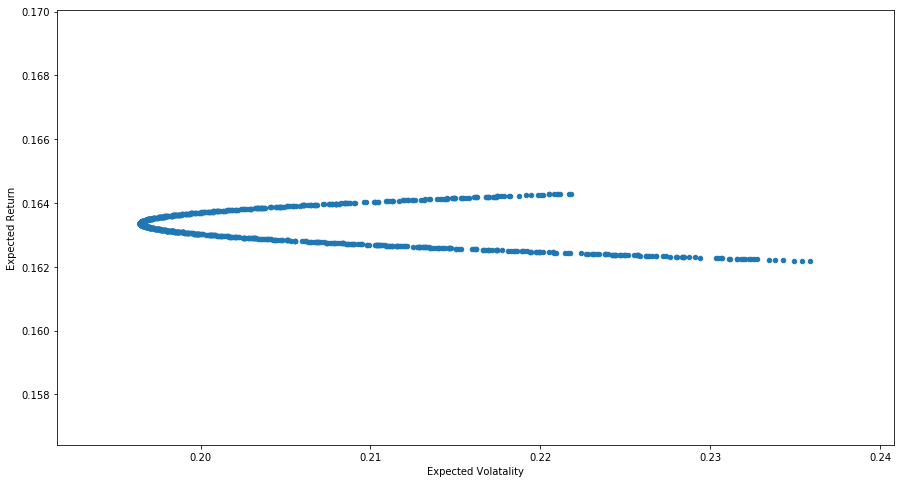

In [92]:
portfolios.plot(x='Volatility',y='Return',kind='scatter',figsize=(15,8))
plt.xlabel('Expected Volatality')
plt.ylabel('Expected Return')

In [94]:
min(pfolio_volatilities)

0.19644997010794701